# Major League Baseball

Major League Baseball is an American professional baseball organization and the oldest of the major professional sports leagues in the United States and Canada. 

A total of 30 teams play in Major League Baseball: 15 teams in the National League and 15 in the American League.

There are 9 players in a team

The playing field is Dimond shaped

There are four bases Home plate, First base, Second base and Third Base

One complete game has 9 innings

# PROBLEM STATEMENT

This dataset utilizes data from 2014 Major League Baseball seasons in order 
to develop an algorithm that predicts the number of wins for a given team 
in the 2015 season based on several different indicators of success. 


There are 16 different features that will be used as the inputs to the 
machine learning and the output will be a value that represents the number 
of wins. 

In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# code to display rows and columns

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [4]:
# Code to display all the columns in the dataset
pd.set_option('display.max_columns', None)

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [6]:
df = pd.read_csv("base.csv")

In [7]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# Column Description

# Problem Type

1) Given the number of  inputs the Machine learning Algorithm has to 
   predict the number of wins (W)
   
2) Target Variable is WINS

3) Solving it as a Classification problem

In [8]:
# Checking the data types

df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

#### 90 % of the datatypes are int and one is float(ERA)

In [10]:
# checking shape of data

df.shape

(30, 17)

In [11]:
# No of rows and columns

# Rows --> 30

# Columns --> 17

In [12]:
#Lets check for duplicate values

df.duplicated().sum()

0

In [13]:
# No duplicate values

In [14]:
# Lets check for missing values

df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [15]:
# No null values

In [16]:
# Checking out the columns

df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [17]:
# using Describe to get an overview of data

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
W,30.0,80.966667,10.453455,63.00,74.0000,81.000,87.75,100.00
R,30.0,688.233333,58.761754,573.00,651.2500,689.000,718.25,891.00
AB,30.0,5516.266667,70.467372,5385.00,5464.0000,5510.000,5570.00,5649.00
H,30.0,1403.533333,57.140923,1324.00,1363.0000,1382.500,1451.50,1515.00
2B,30.0,274.733333,18.095405,236.00,262.2500,275.500,288.75,308.00
3B,30.0,31.300000,10.452355,13.00,23.0000,31.000,39.00,49.00
HR,30.0,163.633333,31.823309,100.00,140.2500,158.500,177.00,232.00
BB,30.0,469.100000,57.053725,375.00,428.2500,473.000,501.25,570.00
SO,30.0,1248.200000,103.759470,973.00,1157.5000,1261.500,1311.50,1518.00
SB,30.0,83.500000,22.815225,44.00,69.0000,83.500,96.50,134.00


# Some conclusions from the above table

1) The minimum runs scored in the 2014 season were 573 and max runs scored
   were 891

2) The At Bats(on strike to face the pitcher) the average was about 5516
   so in the complete season, there are a total of 5516 times a striker
   faces a pitcher
  
3) The the 2014 season the minimum total Hits were 1324 and a maximum of 
   1515 hits 
 
4) The highest number of Doubles scored in a season were 308

5) The highest number of Triples scored in a season where 39

6) Maximum of 232 home runs were scored in a single season

7) On Average there were 469 walks i.e when a pitcher throws four pitches      out of the strike zone

8) The maximum strikeouts in a season were 1518

9) The maximum stolen bases in a season were 134

10) A max of 799 runs were earned in the 2014 season

11) A max of 62 saves in the 2014 season

12) A max of 126 errors were committed in a season

13) The maximum number of wins in a single season was 100

<AxesSubplot:>

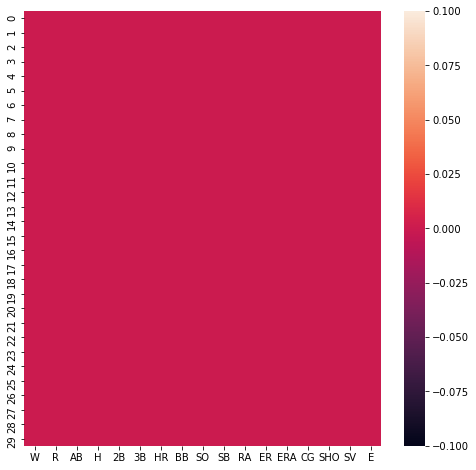

In [18]:
# Visualizing the missing values
plt.figure(figsize=(8,8))
sns.heatmap(df.isnull())

In [19]:
# Luckly no missing values

# EDA

In [20]:
sns.set_theme(style="darkgrid")

In [21]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

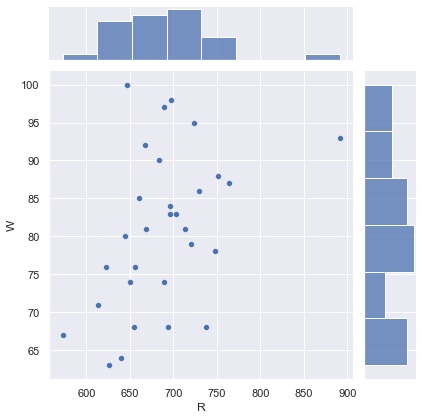

In [22]:
sns.jointplot(x="R",y="W",data=df)

- From the above plot, we can say that there is no conclusive evidence that
  if a team scores more run then that team will have more wins

- The teams who have scored (600 - 700) runs in a season also have a good
  win rate

- So more runs do not guarantee that a team will have more wins

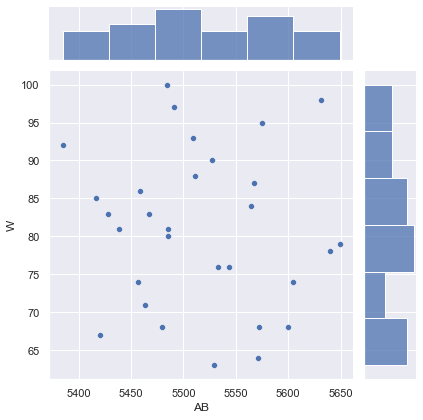

In [23]:
sns.jointplot(x="AB",y="W",data=df)

From the above plot, we can say that the more times the striker faces the pitcher higher is the chance of him scoring more runs

Like normally the more balls the striker faces the higher is the chance of scoring more runs

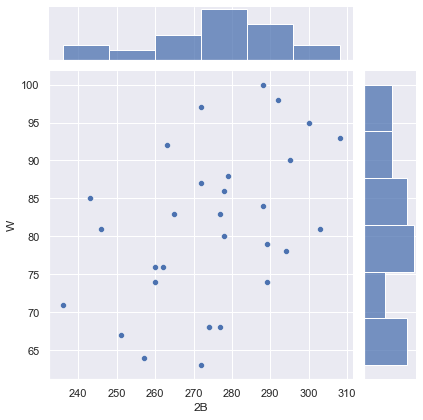

In [24]:
sns.jointplot(x="2B",y="W",data=df)

From the above plot, we can clearly say that the more the Doubles(runs) the higher is the win rate 

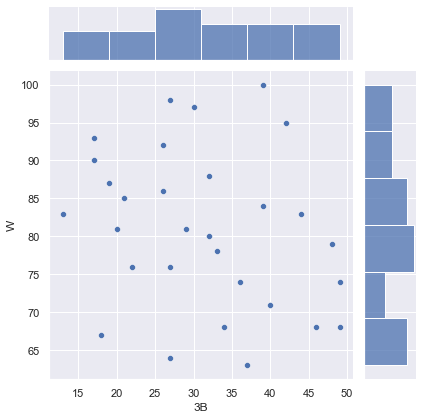

In [25]:
sns.jointplot(x="3B",y="W",data=df)

The 3B (Triples) runs will have a good impact on the Score and can also improve the overall win rate of a Team 

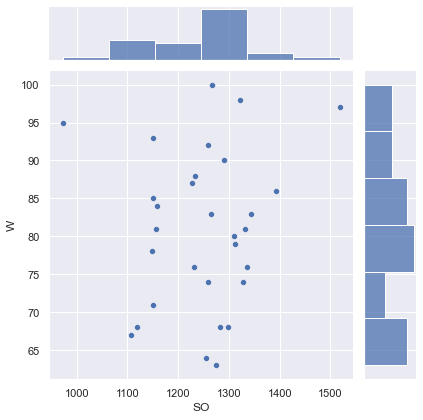

In [26]:
sns.jointplot(x="SO",y="W",data=df)

As expected the team which takes the higher Strikeouts has a higher chance of winning

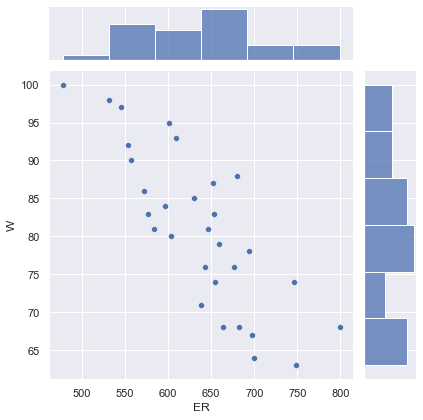

In [27]:
sns.jointplot(x="ER",y="W",data=df)

from the above plot, we can see that the higher the Earned runs the lower the win rate

So teams with higher Earned runs are not particularly having a good win rate

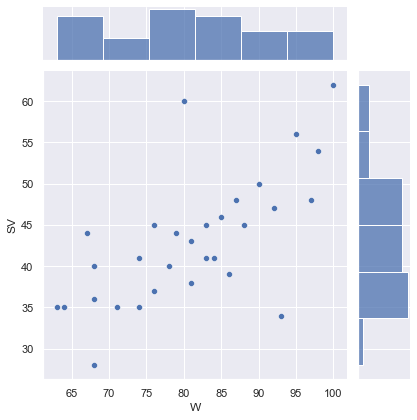

In [28]:
sns.jointplot(x="W",y="SV",data=df)

In the above plot, we can clearly see that the more the amount of Saves higher is the win rate

Saves and Wins are having somewhat a positive relationship

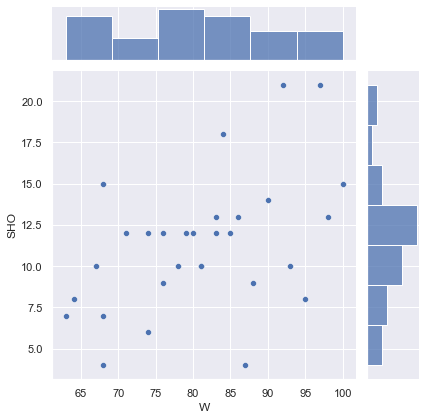

In [29]:
sns.jointplot(x="W",y="SHO",data=df)

from the above plot, we can say that teams with good pitchers will always have a higher win rate

The Higher the shutouts by a pitcher the more the chance of winning a game

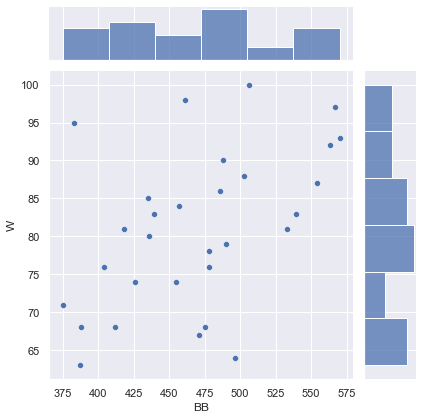

In [30]:
sns.jointplot(x="BB",y="W",data=df)

From the above plot, we can observe that if the opposition pitcher is not accurate enough then higher is the chance for the striker to get more Walks

More the Walks the striker gets higher is the chance of his team winning a game

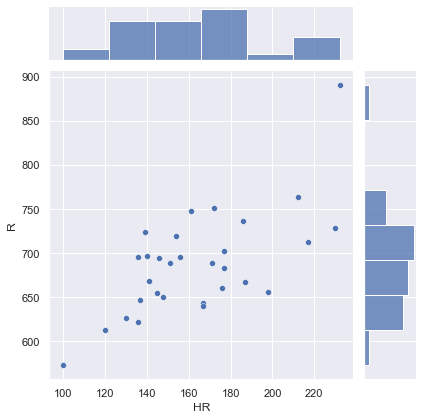

In [31]:
sns.jointplot(x="HR",y="R",data=df)

As expected more the Homeruns more will be the total runs scored

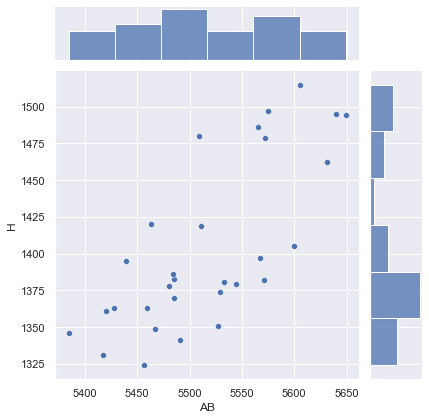

In [32]:
sns.jointplot(x="AB",y="H",data=df)

From the above plot, we can clearly see that the More times the striker is on the Home base more the amounts of Hits he gets

A very good positive correlation between At Bats and number of Hits

<AxesSubplot:xlabel='SV', ylabel='Count'>

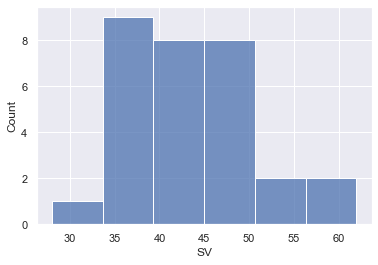

In [33]:
sns.histplot(x="SV",data=df)

Most of the saves lie in the range (35 to 50)

More Saves the team has higher are the chances of the team to win the competition.

<AxesSubplot:xlabel='SHO', ylabel='Count'>

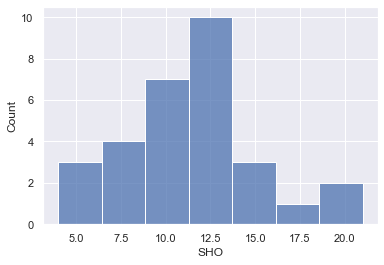

In [34]:
sns.histplot(x="SHO",data=df)

From the above plot, we can observe that there were a max of 21 shutouts in the whole season

Shutouts are considered rare, But they have a good impact on the win rate

<AxesSubplot:xlabel='ERA', ylabel='Count'>

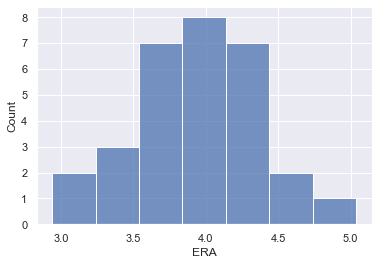

In [35]:
sns.histplot(x="ERA",data=df)

Earned Run Average (ERA) for the MLB season 2014 is between (2.9 - 5)

Lower the Earned Run Average (ERA) better is the quality of pitcher

<AxesSubplot:xlabel='RA', ylabel='Count'>

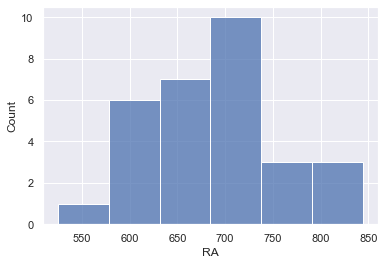

In [36]:
sns.histplot(x="RA",data=df)

The minimum runs scored against a pitcher for the year 2014 were 525

The maximum runs scored against a pitcher for the year 2014 were 844

We can say that the lesser the runs scored against a pitcher higher are the chance of his team winning

<AxesSubplot:xlabel='SB', ylabel='Count'>

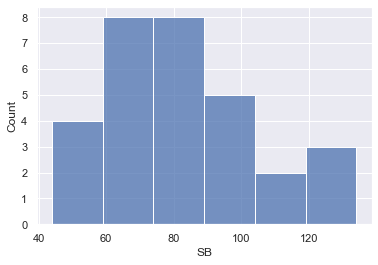

In [37]:
sns.histplot(x="SB",data=df)

On average there were 84 stolen bases in the 2014 season

Stolen bases have an important factor in deciding close games where every run is crucial


<AxesSubplot:xlabel='R', ylabel='W'>

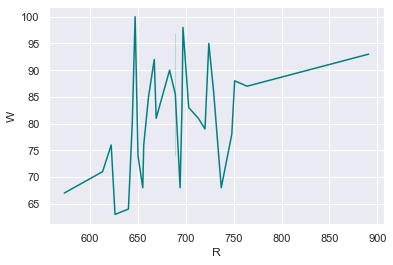

In [38]:
sns.lineplot(x="R",y="W",data=df,color="teal")

In the above plot, we can observe that there are high spikes in the range of 650 to 750 which is displaying a high win rate 

If a certain team scores less than 500 runs in the whole season there is very low chance of them winning the league

<AxesSubplot:xlabel='SHO', ylabel='W'>

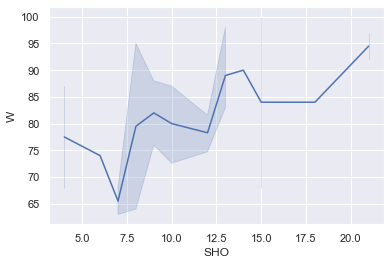

In [39]:
sns.lineplot(x="SHO",y="W",data=df)

Win rate increases with increase in the amount of Shutouts

We can say that a good pitcher will win a lot of games for his team

<AxesSubplot:xlabel='BB', ylabel='W'>

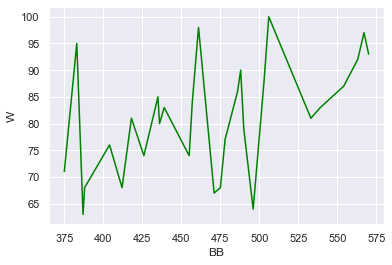

In [40]:
sns.lineplot(x="BB",y="W",data=df,color="Green")

The more the Walks (the safest medium to get a run) the higher chance of scoring more runs 

<AxesSubplot:xlabel='HR', ylabel='W'>

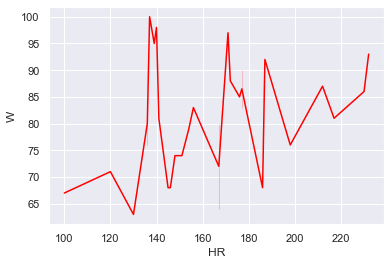

In [41]:
sns.lineplot(x="HR",y="W",data=df,color="red")

Home Runs are good but we cannot say that they are the most important factor for a team to win more matches

In [42]:
# Lets check the correlation of inputs with target variable

In [43]:
co = df.corr()

<AxesSubplot:>

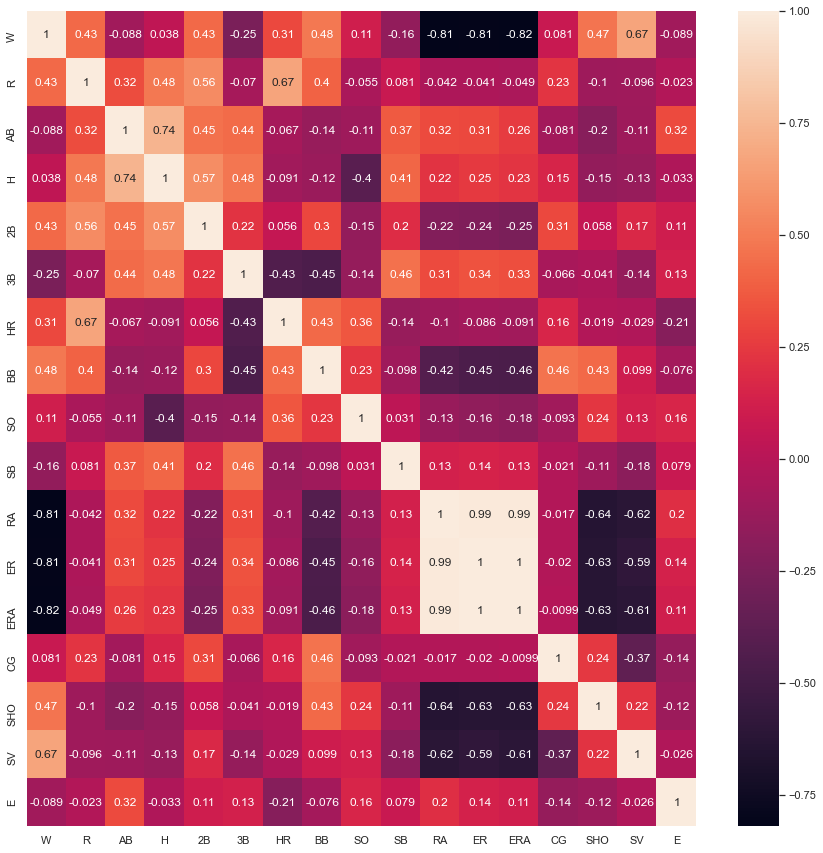

In [44]:
plt.figure(figsize=(15,15))
sns.heatmap(data=co,annot=True)

- The Saves Attribute is having the highest correlation with the target variable Wins

- Shutouts Attribute is also having an impact on the target variable

- Walks attribute is having good correlation with the target variable

- The Runs attribute is also having some good correlation with target variable

- Doubles is having some good correlation with target variable

- Home is having some good correlation with target variable

In [45]:
# Scatter plots for correlation more than 40 with target variable

Text(0, 0.5, 'Number of wins')

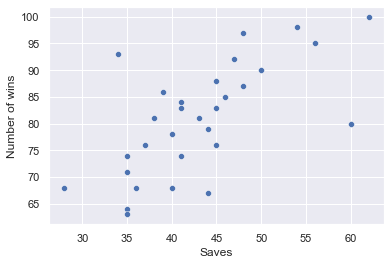

In [46]:
sns.scatterplot(x="SV",y="W",data=df)
plt.xlabel("Saves")
plt.ylabel("Number of wins")

- A good linear relationship between Saves and wins

- Higher the saves higher the wins

- A good pitcher will diliver more wins

Text(0, 0.5, 'Number of wins')

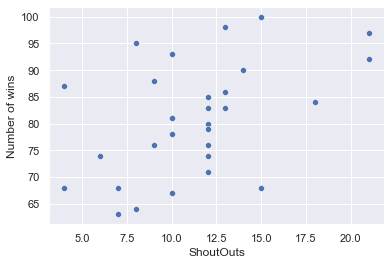

In [47]:
sns.scatterplot(x="SHO",y="W",data=df)
plt.xlabel("ShoutOuts")
plt.ylabel("Number of wins")

- A good linear relationship between ShoutOuts and wins

- Higher the shoutouts higher the wins

- shoutouts are very rare and difficult to achieve

Text(0, 0.5, 'Number of wins')

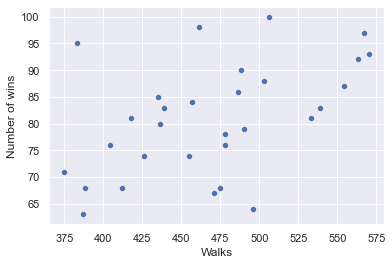

In [48]:
sns.scatterplot(x="BB",y="W",data=df)
plt.xlabel("Walks")
plt.ylabel("Number of wins")

- A good linear relationship between Walks and wins

- Higher the Waks higher the wins

- Walks are good for the strikers as they are the safest way to get runs on   the bord

# Data Cleaning

 There are no missing values in the dataset

In [49]:
from scipy import stats

In [50]:
# creating function to count outliers
def outliers(cname):
    Q1 = df[cname].quantile(0.25)
    Q3 = df[cname].quantile(0.75)
    IQR = stats.iqr(df[cname])
    print('The first quartile :',Q1,'for',cname)
    print('The third quartile :',Q3,'for',cname)
    print('The IQR :', IQR,'for',cname)
    
    L_outlier = Q1 - 1.5*(Q3 - Q1)  
    U_outlier = Q3 + 1.5*(Q3 - Q1)

    print('The left outlier :',L_outlier,'for',cname)
    print('The Right outlier :',U_outlier,'for',cname)
    
    print("Left Outliers :",df[df[cname] < L_outlier][cname].count())
    print("Right Outliers :",df[df[cname] > U_outlier][cname].count())

In [51]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

# Clecking Outliers

In [52]:
# Lets check some box plots

<AxesSubplot:xlabel='R'>

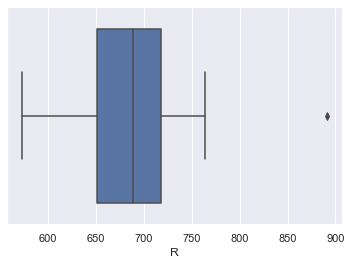

In [53]:
sns.boxplot(x="R",data=df)

In [54]:
outliers("R")

The first quartile : 651.25 for R
The third quartile : 718.25 for R
The IQR : 67.0 for R
The left outlier : 550.75 for R
The Right outlier : 818.75 for R
Left Outliers : 0
Right Outliers : 1


In [55]:
# There is one outlier in Run

<AxesSubplot:xlabel='AB'>

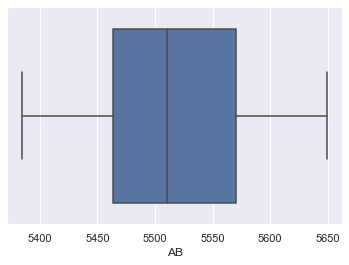

In [56]:
sns.boxplot(x="AB",data=df)

In [57]:
outliers("AB")

The first quartile : 5464.0 for AB
The third quartile : 5570.0 for AB
The IQR : 106.0 for AB
The left outlier : 5305.0 for AB
The Right outlier : 5729.0 for AB
Left Outliers : 0
Right Outliers : 0


In [58]:
# No outliers in At Bats

<AxesSubplot:xlabel='H'>

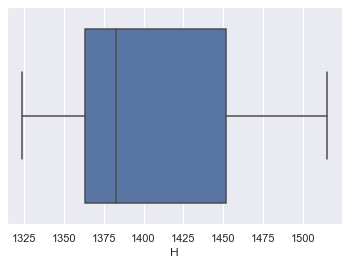

In [59]:
sns.boxplot(x="H",data=df)

In [60]:
outliers("H")

The first quartile : 1363.0 for H
The third quartile : 1451.5 for H
The IQR : 88.5 for H
The left outlier : 1230.25 for H
The Right outlier : 1584.25 for H
Left Outliers : 0
Right Outliers : 0


In [61]:
# No outliers in Hits

<AxesSubplot:xlabel='2B'>

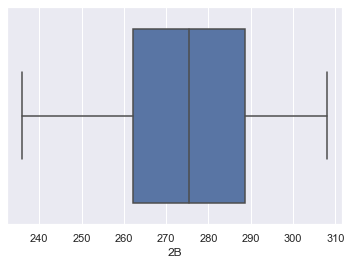

In [62]:
sns.boxplot(x="2B",data=df)

In [63]:
outliers("2B")

The first quartile : 262.25 for 2B
The third quartile : 288.75 for 2B
The IQR : 26.5 for 2B
The left outlier : 222.5 for 2B
The Right outlier : 328.5 for 2B
Left Outliers : 0
Right Outliers : 0


In [64]:
# No outliers in Doubles

<AxesSubplot:xlabel='3B'>

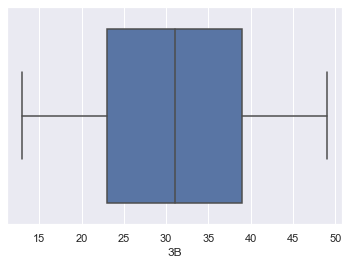

In [65]:
sns.boxplot(x="3B",data=df)

In [66]:
outliers("3B")

The first quartile : 23.0 for 3B
The third quartile : 39.0 for 3B
The IQR : 16.0 for 3B
The left outlier : -1.0 for 3B
The Right outlier : 63.0 for 3B
Left Outliers : 0
Right Outliers : 0


In [67]:
# No outliers in Triples

<AxesSubplot:xlabel='HR'>

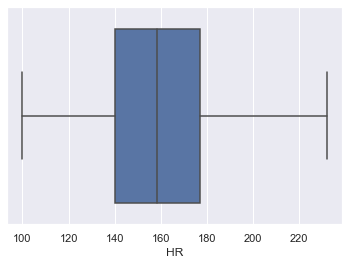

In [68]:
sns.boxplot(x="HR",data=df)

In [69]:
outliers("HR")

The first quartile : 140.25 for HR
The third quartile : 177.0 for HR
The IQR : 36.75 for HR
The left outlier : 85.125 for HR
The Right outlier : 232.125 for HR
Left Outliers : 0
Right Outliers : 0


In [70]:
# No outliers in HR

<AxesSubplot:xlabel='BB'>

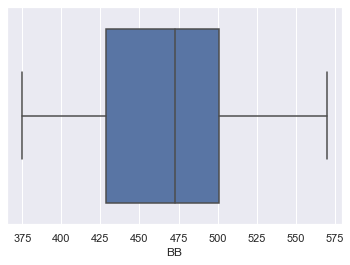

In [71]:
sns.boxplot(x="BB",data=df)

In [72]:
outliers("BB")

The first quartile : 428.25 for BB
The third quartile : 501.25 for BB
The IQR : 73.0 for BB
The left outlier : 318.75 for BB
The Right outlier : 610.75 for BB
Left Outliers : 0
Right Outliers : 0


In [73]:
# No outliers in Walks

<AxesSubplot:xlabel='SO'>

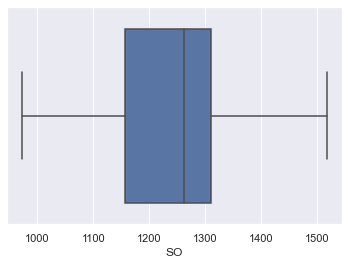

In [74]:
sns.boxplot(x="SO",data=df)

In [75]:
outliers("SO")

The first quartile : 1157.5 for SO
The third quartile : 1311.5 for SO
The IQR : 154.0 for SO
The left outlier : 926.5 for SO
The Right outlier : 1542.5 for SO
Left Outliers : 0
Right Outliers : 0


In [76]:
# No outliers in Strikeouts

<AxesSubplot:xlabel='SB'>

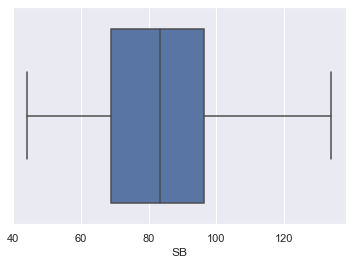

In [77]:
sns.boxplot(x="SB",data=df)

In [78]:
outliers("SB")

The first quartile : 69.0 for SB
The third quartile : 96.5 for SB
The IQR : 27.5 for SB
The left outlier : 27.75 for SB
The Right outlier : 137.75 for SB
Left Outliers : 0
Right Outliers : 0


In [79]:
# No outliers in Stolen Bases

<AxesSubplot:xlabel='RA'>

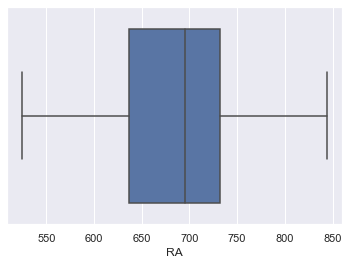

In [80]:
sns.boxplot(x="RA",data=df)

In [81]:
outliers("RA")

The first quartile : 636.25 for RA
The third quartile : 732.5 for RA
The IQR : 96.25 for RA
The left outlier : 491.875 for RA
The Right outlier : 876.875 for RA
Left Outliers : 0
Right Outliers : 0


In [82]:
# No outliers in RA

<AxesSubplot:xlabel='ER'>

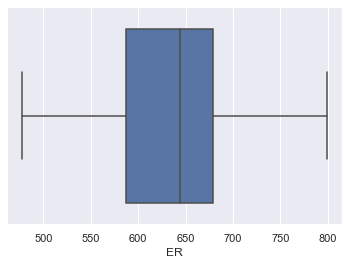

In [83]:
sns.boxplot(x="ER",data=df)

In [84]:
outliers("ER")

The first quartile : 587.25 for ER
The third quartile : 679.25 for ER
The IQR : 92.0 for ER
The left outlier : 449.25 for ER
The Right outlier : 817.25 for ER
Left Outliers : 0
Right Outliers : 0


In [85]:
# No outliers in ER

<AxesSubplot:xlabel='ERA'>

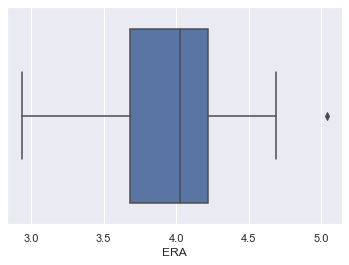

In [86]:
sns.boxplot(x="ERA",data=df)

In [87]:
outliers("ERA")

The first quartile : 3.6825 for ERA
The third quartile : 4.220000000000001 for ERA
The IQR : 0.5375000000000005 for ERA
The left outlier : 2.8762499999999993 for ERA
The Right outlier : 5.026250000000001 for ERA
Left Outliers : 0
Right Outliers : 1


In [88]:
# one outlier in ERA

<AxesSubplot:xlabel='CG'>

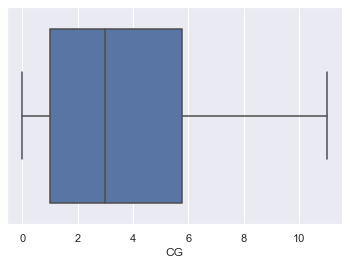

In [89]:
sns.boxplot(x="CG",data=df)

In [90]:
outliers("CG")

The first quartile : 1.0 for CG
The third quartile : 5.75 for CG
The IQR : 4.75 for CG
The left outlier : -6.125 for CG
The Right outlier : 12.875 for CG
Left Outliers : 0
Right Outliers : 0


In [91]:
# No outlier in CG

<AxesSubplot:xlabel='SHO'>

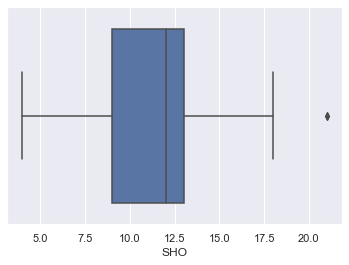

In [92]:
sns.boxplot(x="SHO",data=df)

In [93]:
outliers("SHO")

The first quartile : 9.0 for SHO
The third quartile : 13.0 for SHO
The IQR : 4.0 for SHO
The left outlier : 3.0 for SHO
The Right outlier : 19.0 for SHO
Left Outliers : 0
Right Outliers : 2


In [94]:
# Some outliers in SHO

<AxesSubplot:xlabel='SV'>

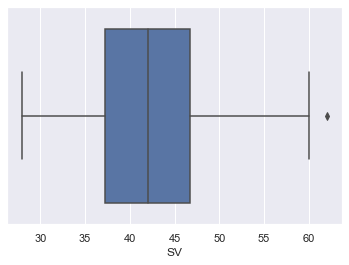

In [95]:
sns.boxplot(x="SV",data=df)

In [96]:
outliers("SV")

The first quartile : 37.25 for SV
The third quartile : 46.75 for SV
The IQR : 9.5 for SV
The left outlier : 23.0 for SV
The Right outlier : 61.0 for SV
Left Outliers : 0
Right Outliers : 1


In [97]:
# One outliers in SV

<AxesSubplot:xlabel='E'>

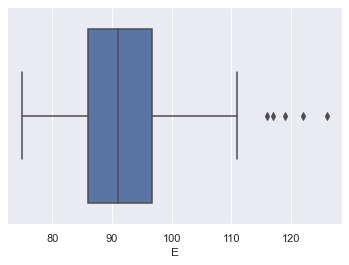

In [98]:
sns.boxplot(x="E",data=df)

In [99]:
outliers("E")

The first quartile : 86.0 for E
The third quartile : 96.75 for E
The IQR : 10.75 for E
The left outlier : 69.875 for E
The Right outlier : 112.875 for E
Left Outliers : 0
Right Outliers : 5


In [100]:
# Some outliers in Errors 

There are some outliers in 
- Errors
- Saves
- Shoutouts 
- Earned Run Average
- Runs

There are outliers in the data we need to handle them

## Removing outliers 

z-score technique

In [101]:
from scipy.stats import zscore

In [102]:
z = np.abs(zscore(df))

In [103]:
z.shape

(30, 17)

In [104]:
threshold = 3
print(np.where(z > 3))

(array([5], dtype=int64), array([1], dtype=int64))


In [105]:
df_new = df[(z < 3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(30, 17)
(29, 17)


## % Data Loss

In [106]:
loss = (30 - 29)/30*100
print(loss)

3.3333333333333335


## Only 3 % of the data was lost  

## Checking Skewness

In [107]:
df = df_new

Taking the skewness range between (-50,+50)

In [108]:
df.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

As we can observe that some of the columns have high skewness but we can ignore them as they are categorical features 

## Checking Displots to check if the plots are Normal or not

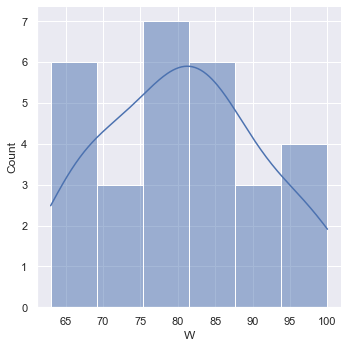

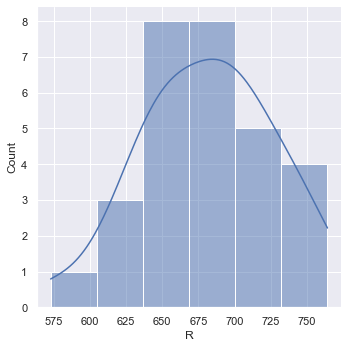

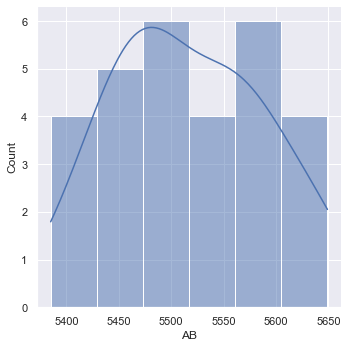

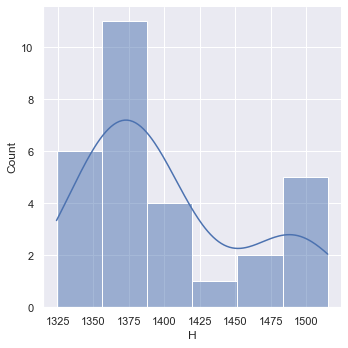

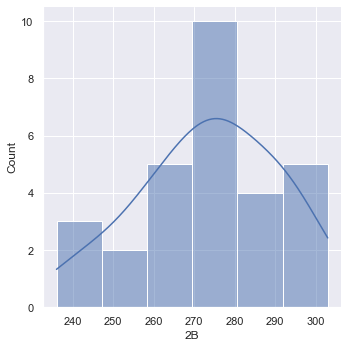

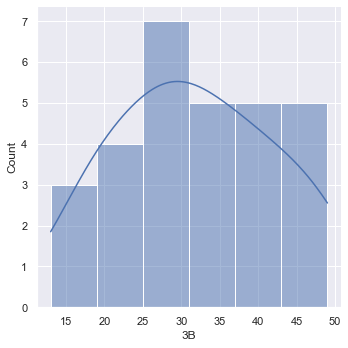

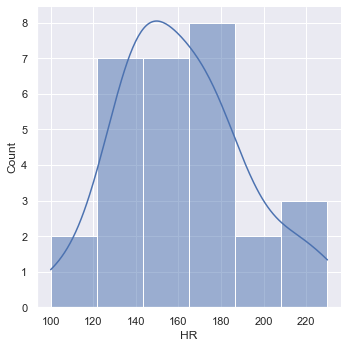

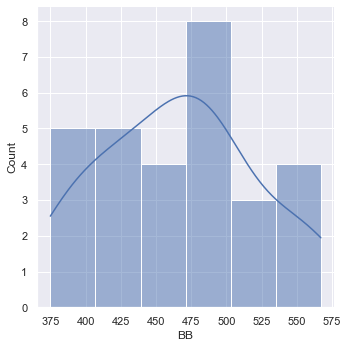

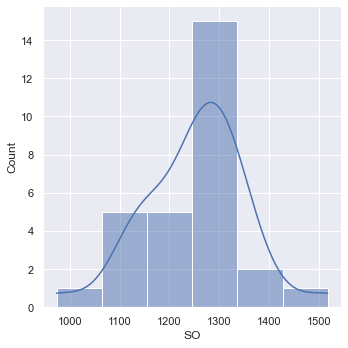

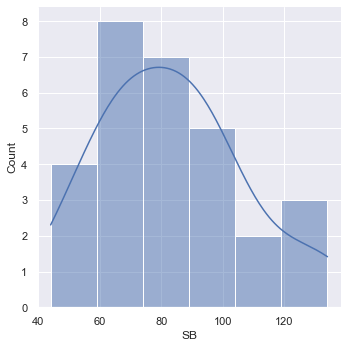

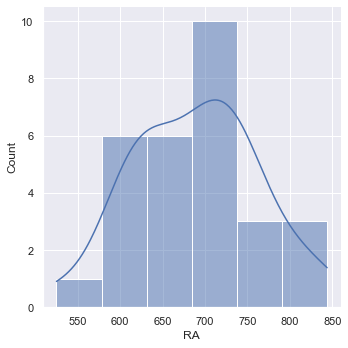

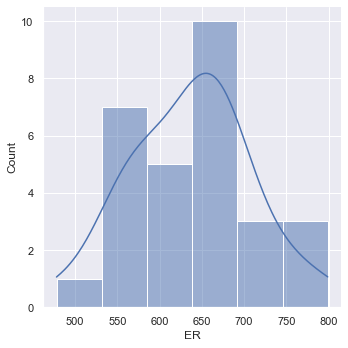

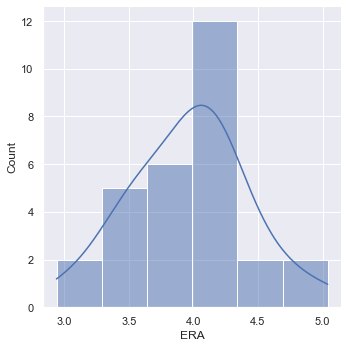

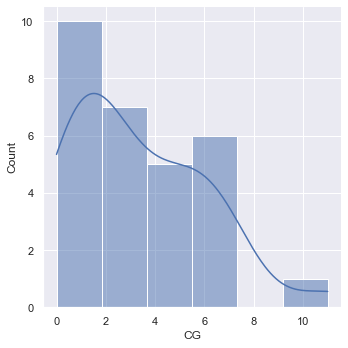

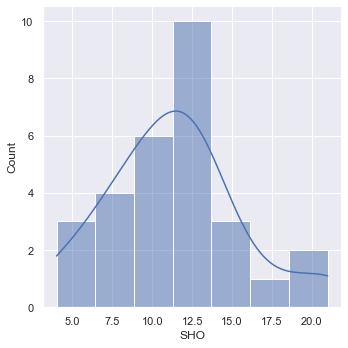

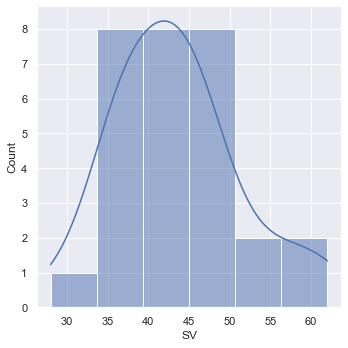

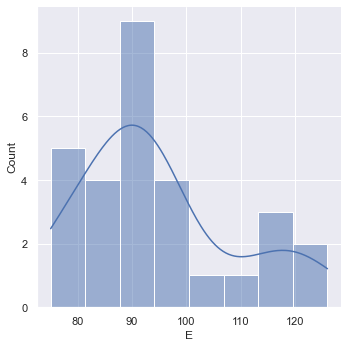

In [109]:
for i in df.columns:
    
    sns.displot(df[i],kde=True)

From the above plots we can observe that most of the plots look normal 

## Feature Engineering

In [110]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


Lets create categories for number of wins

- for wins between (60,80) --> 0
- for wins between (81,100) --> 1

In [111]:
df['W'] = [0 if x < 80 else 1 for x in df['W']]

In [112]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,1,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,0,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,0,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [113]:
df["W"].value_counts()

1    16
0    13
Name: W, dtype: int64

# Train Test Split

In [114]:
X = df.drop("W",axis=1)

In [115]:
X.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [116]:
y = df["W"]

In [117]:
y

0     1
1     1
2     1
3     0
4     0
6     1
7     1
8     1
9     0
10    1
11    1
12    1
13    0
14    0
15    1
16    1
17    1
18    0
19    0
20    1
21    1
22    0
23    0
24    0
25    1
26    1
27    0
28    0
29    0
Name: W, dtype: int64

In [118]:
X = X.values
y = y.values

In [119]:
X

array([[7.240e+02, 5.575e+03, 1.497e+03, 3.000e+02, 4.200e+01, 1.390e+02,
        3.830e+02, 9.730e+02, 1.040e+02, 6.410e+02, 6.010e+02, 3.730e+00,
        2.000e+00, 8.000e+00, 5.600e+01, 8.800e+01],
       [6.960e+02, 5.467e+03, 1.349e+03, 2.770e+02, 4.400e+01, 1.560e+02,
        4.390e+02, 1.264e+03, 7.000e+01, 7.000e+02, 6.530e+02, 4.070e+00,
        2.000e+00, 1.200e+01, 4.500e+01, 8.600e+01],
       [6.690e+02, 5.439e+03, 1.395e+03, 3.030e+02, 2.900e+01, 1.410e+02,
        5.330e+02, 1.157e+03, 8.600e+01, 6.400e+02, 5.840e+02, 3.670e+00,
        1.100e+01, 1.000e+01, 3.800e+01, 7.900e+01],
       [6.220e+02, 5.533e+03, 1.381e+03, 2.600e+02, 2.700e+01, 1.360e+02,
        4.040e+02, 1.231e+03, 6.800e+01, 7.010e+02, 6.430e+02, 3.980e+00,
        7.000e+00, 9.000e+00, 3.700e+01, 1.010e+02],
       [6.890e+02, 5.605e+03, 1.515e+03, 2.890e+02, 4.900e+01, 1.510e+02,
        4.550e+02, 1.259e+03, 8.300e+01, 8.030e+02, 7.460e+02, 4.640e+00,
        7.000e+00, 1.200e+01, 3.500e+01, 8.600e+

In [120]:
y

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [121]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [126]:
X_train.shape

(20, 16)

In [127]:
y_train.shape

(20,)

In [128]:
X_test.shape

(9, 16)

In [129]:
y_test.shape

(9,)

### Scaling

In [130]:
from sklearn.preprocessing import StandardScaler

In [131]:
sc = StandardScaler()

In [132]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [133]:
X_train.shape

(20, 16)

In [134]:
X_test.shape

(9, 16)

## Machine Learning

### Logistic regression

In [135]:
from sklearn.linear_model import LogisticRegression

In [136]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [137]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    mod_1 = LogisticRegression() 
    mod_1.fit(X_train,y_train)
    train_score_1 = mod_1.score(X_train,y_train)
    pred_1 = mod_1.predict(X_test)
    test_score_1 = accuracy_score(y_test,pred_1)
    
    print("for random state ",i," The training accuracy is :",train_score_1)
    print("for random state ",i," The testing accuracy is :",test_score_1)
    print("\n")


for random state  0  The training accuracy is : 1.0
for random state  0  The testing accuracy is : 0.7777777777777778


for random state  1  The training accuracy is : 1.0
for random state  1  The testing accuracy is : 1.0


for random state  2  The training accuracy is : 1.0
for random state  2  The testing accuracy is : 0.7777777777777778


for random state  3  The training accuracy is : 1.0
for random state  3  The testing accuracy is : 0.8888888888888888


for random state  4  The training accuracy is : 1.0
for random state  4  The testing accuracy is : 1.0


for random state  5  The training accuracy is : 1.0
for random state  5  The testing accuracy is : 0.7777777777777778


for random state  6  The training accuracy is : 1.0
for random state  6  The testing accuracy is : 0.8888888888888888


for random state  7  The training accuracy is : 1.0
for random state  7  The testing accuracy is : 0.7777777777777778


for random state  8  The training accuracy is : 1.0
for random state  

for random state  75  The training accuracy is : 1.0
for random state  75  The testing accuracy is : 1.0


for random state  76  The training accuracy is : 1.0
for random state  76  The testing accuracy is : 0.8888888888888888


for random state  77  The training accuracy is : 1.0
for random state  77  The testing accuracy is : 0.8888888888888888


for random state  78  The training accuracy is : 1.0
for random state  78  The testing accuracy is : 1.0


for random state  79  The training accuracy is : 1.0
for random state  79  The testing accuracy is : 0.8888888888888888


for random state  80  The training accuracy is : 1.0
for random state  80  The testing accuracy is : 0.6666666666666666


for random state  81  The training accuracy is : 1.0
for random state  81  The testing accuracy is : 0.8888888888888888


for random state  82  The training accuracy is : 1.0
for random state  82  The testing accuracy is : 0.8888888888888888


for random state  83  The training accuracy is : 1.0
f

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)
mod_1 = LogisticRegression()
mod_1.fit(X_train,y_train)
train_score_1 = mod_1.score(X_train,y_train)
pred_1 = mod_1.predict(X_test)
test_score_1 = accuracy_score(y_test,pred_1)
    
print("The training accuracy is :",train_score_1)
print("The testing accuracy is :",test_score_1)


The training accuracy is : 1.0
The testing accuracy is : 1.0


In [140]:
print(confusion_matrix(y_test,pred_1))
print("\n")
print(classification_report(y_test,pred_1))
print("\n")

[[3 0]
 [0 6]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9





## Stratified Validation

In [141]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [142]:
kfold = StratifiedKFold(n_splits=10,random_state=35)

K_results = cross_val_score(mod_1,X,y,cv=kfold)

kfold_accuracy_LR = np.mean(abs(K_results))

In [143]:
kfold_accuracy_LR

0.9

In [144]:
K_results

array([1.        , 1.        , 1.        , 0.66666667, 0.66666667,
       1.        , 1.        , 1.        , 0.66666667, 1.        ])

In [145]:
score = {"Algorithm":["Logistic Regression"],
         "Training_Acc":[train_score_1],
        "Accuracy":[test_score_1],
        "Cross_validation":[kfold_accuracy_LR]}

final_card = pd.DataFrame(score)

In [146]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,1.0,1.0,0.9


## Naive Bayes

In [147]:
from sklearn.naive_bayes import GaussianNB

In [148]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    mod_2 = GaussianNB() 
    mod_2.fit(X_train,y_train)
    train_score_2 = mod_2.score(X_train,y_train)
    pred_2 = mod_2.predict(X_test)
    test_score_2 = accuracy_score(y_test,pred_2)
    
    print("for random state ",i," The training accuracy is :",train_score_2)
    print("for random state ",i," The testing accuracy is :",test_score_2)
    print("\n")

for random state  0  The training accuracy is : 0.95
for random state  0  The testing accuracy is : 1.0


for random state  1  The training accuracy is : 0.9
for random state  1  The testing accuracy is : 0.8888888888888888


for random state  2  The training accuracy is : 1.0
for random state  2  The testing accuracy is : 0.7777777777777778


for random state  3  The training accuracy is : 0.95
for random state  3  The testing accuracy is : 0.7777777777777778


for random state  4  The training accuracy is : 0.95
for random state  4  The testing accuracy is : 1.0


for random state  5  The training accuracy is : 0.95
for random state  5  The testing accuracy is : 1.0


for random state  6  The training accuracy is : 0.9
for random state  6  The testing accuracy is : 0.7777777777777778


for random state  7  The training accuracy is : 0.95
for random state  7  The testing accuracy is : 0.6666666666666666


for random state  8  The training accuracy is : 0.95
for random state  8  The te

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=29)
mod_2 = GaussianNB() 
mod_2.fit(X_train,y_train)
train_score_2 = mod_2.score(X_train,y_train)
pred_2 = mod_2.predict(X_test)
test_score_2 = accuracy_score(y_test,pred_2)
    
print("The training accuracy is :",train_score_2)
print("The testing accuracy is :",test_score_2)
print("\n")

The training accuracy is : 0.9
The testing accuracy is : 0.8888888888888888




In [151]:
print(confusion_matrix(y_test,pred_2))
print("\n")
print(classification_report(y_test,pred_2))
print("\n")

[[4 1]
 [0 4]]


              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.80      1.00      0.89         4

    accuracy                           0.89         9
   macro avg       0.90      0.90      0.89         9
weighted avg       0.91      0.89      0.89         9





## Stratified Crossvalidation

In [152]:
kfold = StratifiedKFold(n_splits=10,random_state=29)

K_results = cross_val_score(mod_2,X,y,cv=kfold)

kfold_accuracy_NB = np.mean(abs(K_results))

In [153]:
kfold_accuracy_NB

0.9

In [154]:
score = {"Algorithm":["Logistic Regression","Naive Bayes"],
         "Training_Acc":[train_score_1,train_score_2],
        "Accuracy":[test_score_1,test_score_2],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB]}

final_card = pd.DataFrame(score)

In [155]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,1.0,1.000000,0.9
1,Naive Bayes,0.9,0.888889,0.9


##  Random_forest_classification

In [156]:
from sklearn.ensemble import RandomForestClassifier

In [157]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    mod_3 = RandomForestClassifier() 
    mod_3.fit(X_train,y_train)
    train_score_3 = mod_3.score(X_train,y_train)
    pred_3 = mod_3.predict(X_test)
    test_score_3 = accuracy_score(y_test,pred_3)
    
    print("for random state ",i," The training accuracy is :",train_score_3)
    print("for random state ",i," The testing accuracy is :",test_score_3)
    print("\n")

for random state  0  The training accuracy is : 1.0
for random state  0  The testing accuracy is : 0.8888888888888888


for random state  1  The training accuracy is : 1.0
for random state  1  The testing accuracy is : 0.7777777777777778


for random state  2  The training accuracy is : 1.0
for random state  2  The testing accuracy is : 0.6666666666666666


for random state  3  The training accuracy is : 1.0
for random state  3  The testing accuracy is : 0.6666666666666666


for random state  4  The training accuracy is : 1.0
for random state  4  The testing accuracy is : 0.8888888888888888


for random state  5  The training accuracy is : 1.0
for random state  5  The testing accuracy is : 0.7777777777777778


for random state  6  The training accuracy is : 1.0
for random state  6  The testing accuracy is : 0.7777777777777778


for random state  7  The training accuracy is : 1.0
for random state  7  The testing accuracy is : 0.5555555555555556


for random state  8  The training accura

for random state  69  The training accuracy is : 1.0
for random state  69  The testing accuracy is : 0.8888888888888888


for random state  70  The training accuracy is : 1.0
for random state  70  The testing accuracy is : 0.8888888888888888


for random state  71  The training accuracy is : 1.0
for random state  71  The testing accuracy is : 0.8888888888888888


for random state  72  The training accuracy is : 1.0
for random state  72  The testing accuracy is : 0.5555555555555556


for random state  73  The training accuracy is : 1.0
for random state  73  The testing accuracy is : 0.8888888888888888


for random state  74  The training accuracy is : 1.0
for random state  74  The testing accuracy is : 0.8888888888888888


for random state  75  The training accuracy is : 1.0
for random state  75  The testing accuracy is : 0.6666666666666666


for random state  76  The training accuracy is : 1.0
for random state  76  The testing accuracy is : 0.7777777777777778


for random state  77  Th

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=65)
mod_3 = RandomForestClassifier() 
mod_3.fit(X_train,y_train)
train_score_3 = mod_3.score(X_train,y_train)
pred_3 = mod_3.predict(X_test)
test_score_3 = accuracy_score(y_test,pred_3)
    
print("for random state ",i," The training accuracy is :",train_score_3)
print("for random state ",i," The testing accuracy is :",test_score_3)
print("\n")

for random state  100  The training accuracy is : 1.0
for random state  100  The testing accuracy is : 1.0




In [159]:
print(confusion_matrix(y_test,pred_3))
print("\n")
print(classification_report(y_test,pred_3))
print("\n")

[[4 0]
 [0 5]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9





## Stratified Cross Validation

In [160]:
kfold = StratifiedKFold(n_splits=10,random_state=65)

K_results = cross_val_score(mod_3,X,y,cv=kfold)

kfold_accuracy_RFR = np.mean(abs(K_results))

In [161]:
kfold_accuracy_RFR

0.8666666666666668

In [162]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3],
        "Accuracy":[test_score_1,test_score_2,test_score_3],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR]}

final_card = pd.DataFrame(score)

In [163]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,1.0,1.000000,0.900000
1,Naive Bayes,0.9,0.888889,0.900000
2,Random Forest Classi,1.0,1.000000,0.866667


##  Decision Tree

In [164]:
from sklearn.tree import DecisionTreeClassifier

In [170]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    mod_4 = DecisionTreeClassifier() 
    mod_4.fit(X_train,y_train)
    train_score_4 = mod_4.score(X_train,y_train)
    pred_4 = mod_4.predict(X_test)
    test_score_4 = accuracy_score(y_test,pred_4)
    
    print("for random state ",i," The training accuracy is :",train_score_4)
    print("for random state ",i," The testing accuracy is :",test_score_4)
    print("\n")

for random state  0  The training accuracy is : 1.0
for random state  0  The testing accuracy is : 1.0


for random state  1  The training accuracy is : 1.0
for random state  1  The testing accuracy is : 0.7777777777777778


for random state  2  The training accuracy is : 1.0
for random state  2  The testing accuracy is : 0.5555555555555556


for random state  3  The training accuracy is : 1.0
for random state  3  The testing accuracy is : 0.7777777777777778


for random state  4  The training accuracy is : 1.0
for random state  4  The testing accuracy is : 0.8888888888888888


for random state  5  The training accuracy is : 1.0
for random state  5  The testing accuracy is : 0.8888888888888888


for random state  6  The training accuracy is : 1.0
for random state  6  The testing accuracy is : 0.7777777777777778


for random state  7  The training accuracy is : 1.0
for random state  7  The testing accuracy is : 0.6666666666666666


for random state  8  The training accuracy is : 1.0
for

for random state  79  The training accuracy is : 1.0
for random state  79  The testing accuracy is : 0.8888888888888888


for random state  80  The training accuracy is : 1.0
for random state  80  The testing accuracy is : 0.6666666666666666


for random state  81  The training accuracy is : 1.0
for random state  81  The testing accuracy is : 0.8888888888888888


for random state  82  The training accuracy is : 1.0
for random state  82  The testing accuracy is : 0.7777777777777778


for random state  83  The training accuracy is : 1.0
for random state  83  The testing accuracy is : 0.6666666666666666


for random state  84  The training accuracy is : 1.0
for random state  84  The testing accuracy is : 0.7777777777777778


for random state  85  The training accuracy is : 1.0
for random state  85  The testing accuracy is : 0.8888888888888888


for random state  86  The training accuracy is : 1.0
for random state  86  The testing accuracy is : 0.7777777777777778


for random state  87  Th

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
mod_4 = DecisionTreeClassifier() 
mod_4.fit(X_train,y_train)
train_score_4 = mod_4.score(X_train,y_train)
pred_4 = mod_4.predict(X_test)
test_score_4 = accuracy_score(y_test,pred_4)
    
print("The training accuracy is :",train_score_4)
print("The testing accuracy is :",test_score_4)
print("\n")

The training accuracy is : 1.0
The testing accuracy is : 1.0




In [176]:
print(confusion_matrix(y_test,pred_4))
print("\n")
print(classification_report(y_test,pred_4))
print("\n")

[[4 0]
 [0 5]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9





## Stratified Cross Validation

In [178]:
kfold = StratifiedKFold(n_splits=10,random_state=24)

K_results = cross_val_score(mod_4,X,y,cv=kfold)

kfold_accuracy_DT = np.mean(abs(K_results))

In [179]:
kfold_accuracy_DT

0.8333333333333333

In [180]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi",
                     "Decision Tree"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4],
        "Accuracy":[test_score_1,test_score_2,test_score_3,
                   test_score_4],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR,kfold_accuracy_DT]}

final_card = pd.DataFrame(score)

In [181]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,1.0,1.000000,0.900000
1,Naive Bayes,0.9,0.888889,0.900000
2,Random Forest Classi,1.0,1.000000,0.866667
3,Decision Tree,1.0,1.000000,0.833333


### Support Vector Machine

In [182]:
from sklearn.svm import SVC

In [184]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    mod_5 = SVC() 
    mod_5.fit(X_train,y_train)
    train_score_5 = mod_5.score(X_train,y_train)
    pred_5 = mod_5.predict(X_test)
    test_score_5 = accuracy_score(y_test,pred_5)
    
    print("for random state ",i," The training accuracy is :",train_score_5)
    print("for random state ",i," The testing accuracy is :",test_score_5)
    print("\n")

for random state  0  The training accuracy is : 0.55
for random state  0  The testing accuracy is : 0.5555555555555556


for random state  1  The training accuracy is : 0.55
for random state  1  The testing accuracy is : 0.5555555555555556


for random state  2  The training accuracy is : 0.6
for random state  2  The testing accuracy is : 0.1111111111111111


for random state  3  The training accuracy is : 0.6
for random state  3  The testing accuracy is : 0.4444444444444444


for random state  4  The training accuracy is : 0.9
for random state  4  The testing accuracy is : 0.8888888888888888


for random state  5  The training accuracy is : 0.55
for random state  5  The testing accuracy is : 0.5555555555555556


for random state  6  The training accuracy is : 0.55
for random state  6  The testing accuracy is : 0.5555555555555556


for random state  7  The training accuracy is : 0.95
for random state  7  The testing accuracy is : 0.5555555555555556


for random state  8  The training a

for random state  85  The training accuracy is : 0.6
for random state  85  The testing accuracy is : 0.4444444444444444


for random state  86  The training accuracy is : 0.65
for random state  86  The testing accuracy is : 0.0


for random state  87  The training accuracy is : 0.65
for random state  87  The testing accuracy is : 0.3333333333333333


for random state  88  The training accuracy is : 0.6
for random state  88  The testing accuracy is : 0.4444444444444444


for random state  89  The training accuracy is : 0.6
for random state  89  The testing accuracy is : 0.4444444444444444


for random state  90  The training accuracy is : 0.55
for random state  90  The testing accuracy is : 0.5555555555555556


for random state  91  The training accuracy is : 0.55
for random state  91  The testing accuracy is : 0.5555555555555556


for random state  92  The training accuracy is : 0.6
for random state  92  The testing accuracy is : 0.4444444444444444


for random state  93  The training 

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)
mod_5 = SVC() 
mod_5.fit(X_train,y_train)
train_score_5 = mod_5.score(X_train,y_train)
pred_5 = mod_5.predict(X_test)
test_score_5 = accuracy_score(y_test,pred_5)
    
print("The training accuracy is :",train_score_5)
print("The testing accuracy is :",test_score_5)
print("\n")

The training accuracy is : 0.95
The testing accuracy is : 0.8888888888888888




In [187]:
print(confusion_matrix(y_test,pred_5))
print("\n")
print(classification_report(y_test,pred_5))
print("\n")

[[3 0]
 [1 5]]


              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.83      0.91         6

    accuracy                           0.89         9
   macro avg       0.88      0.92      0.88         9
weighted avg       0.92      0.89      0.89         9





## Stratified Cross validation

In [188]:
kfold = StratifiedKFold(n_splits=10,random_state=24)

K_results = cross_val_score(mod_5,X,y,cv=kfold)

kfold_accuracy_SVC = np.mean(abs(K_results))


In [189]:
kfold_accuracy_SVC

0.5499999999999999

In [190]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi",
                     "Decision Tree","Support Vector Classification"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_5],
        "Accuracy":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_5],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR,kfold_accuracy_DT,
                           kfold_accuracy_SVC]}

final_card = pd.DataFrame(score)

In [191]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,1.00,1.000000,0.900000
1,Naive Bayes,0.90,0.888889,0.900000
2,Random Forest Classi,1.00,1.000000,0.866667
3,Decision Tree,1.00,1.000000,0.833333
4,Support Vector Classification,0.95,0.888889,0.550000


## AdaBoost

In [192]:
from sklearn.ensemble import AdaBoostClassifier

In [193]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    mod_6 = AdaBoostClassifier() 
    mod_6.fit(X_train,y_train)
    train_score_6 = mod_6.score(X_train,y_train)
    pred_6 = mod_6.predict(X_test)
    test_score_6 = accuracy_score(y_test,pred_6)
    
    print("for random state ",i," The training accuracy is :",train_score_6)
    print("for random state ",i," The testing accuracy is :",test_score_6)
    print("\n")

for random state  0  The training accuracy is : 1.0
for random state  0  The testing accuracy is : 0.7777777777777778


for random state  1  The training accuracy is : 1.0
for random state  1  The testing accuracy is : 0.7777777777777778


for random state  2  The training accuracy is : 1.0
for random state  2  The testing accuracy is : 0.7777777777777778


for random state  3  The training accuracy is : 1.0
for random state  3  The testing accuracy is : 0.6666666666666666


for random state  4  The training accuracy is : 1.0
for random state  4  The testing accuracy is : 0.8888888888888888


for random state  5  The training accuracy is : 1.0
for random state  5  The testing accuracy is : 0.8888888888888888


for random state  6  The training accuracy is : 1.0
for random state  6  The testing accuracy is : 0.6666666666666666


for random state  7  The training accuracy is : 1.0
for random state  7  The testing accuracy is : 0.5555555555555556


for random state  8  The training accura

for random state  68  The training accuracy is : 1.0
for random state  68  The testing accuracy is : 0.8888888888888888


for random state  69  The training accuracy is : 1.0
for random state  69  The testing accuracy is : 0.8888888888888888


for random state  70  The training accuracy is : 1.0
for random state  70  The testing accuracy is : 0.8888888888888888


for random state  71  The training accuracy is : 1.0
for random state  71  The testing accuracy is : 1.0


for random state  72  The training accuracy is : 1.0
for random state  72  The testing accuracy is : 0.4444444444444444


for random state  73  The training accuracy is : 1.0
for random state  73  The testing accuracy is : 0.8888888888888888


for random state  74  The training accuracy is : 1.0
for random state  74  The testing accuracy is : 0.7777777777777778


for random state  75  The training accuracy is : 1.0
for random state  75  The testing accuracy is : 0.6666666666666666


for random state  76  The training accu

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)
mod_6 = AdaBoostClassifier() 
mod_6.fit(X_train,y_train)
train_score_6 = mod_6.score(X_train,y_train)
pred_6 = mod_6.predict(X_test)
test_score_6 = accuracy_score(y_test,pred_6)
    
print("The training accuracy is :",train_score_6)
print("The testing accuracy is :",test_score_6)
print("\n")

The training accuracy is : 1.0
The testing accuracy is : 0.8888888888888888




In [198]:
print(confusion_matrix(y_test,pred_6))
print("\n")
print(classification_report(y_test,pred_6))
print("\n")

[[3 1]
 [0 5]]


              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.83      1.00      0.91         5

    accuracy                           0.89         9
   macro avg       0.92      0.88      0.88         9
weighted avg       0.91      0.89      0.89         9





## Stratified Cross validation

In [199]:
kfold = StratifiedKFold(n_splits=10,random_state=33)

K_results = cross_val_score(mod_6,X,y,cv=kfold)

kfold_accuracy_ADA = np.mean(abs(K_results))

In [200]:
kfold_accuracy_ADA

0.7333333333333333

In [201]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi",
                     "Decision Tree","Support Vector Classification",
                     "ADABoost Classification"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_5,train_score_6],
        "Accuracy":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_5,test_score_6],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR,kfold_accuracy_DT,
                           kfold_accuracy_SVC,kfold_accuracy_ADA]}

final_card = pd.DataFrame(score)

In [202]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,1.00,1.000000,0.900000
1,Naive Bayes,0.90,0.888889,0.900000
2,Random Forest Classi,1.00,1.000000,0.866667
3,Decision Tree,1.00,1.000000,0.833333
4,Support Vector Classification,0.95,0.888889,0.550000
5,ADABoost Classification,1.00,0.888889,0.733333


## K Neighbor classifier

In [203]:
from sklearn.neighbors import KNeighborsClassifier

In [204]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    mod_7 = KNeighborsClassifier() 
    mod_7.fit(X_train,y_train)
    train_score_7 = mod_7.score(X_train,y_train)
    pred_7 = mod_7.predict(X_test)
    test_score_7 = accuracy_score(y_test,pred_7)
    
    print("for random state ",i," The training accuracy is :",train_score_7)
    print("for random state ",i," The testing accuracy is :",test_score_7)
    print("\n")

for random state  0  The training accuracy is : 0.9
for random state  0  The testing accuracy is : 0.5555555555555556


for random state  1  The training accuracy is : 0.8
for random state  1  The testing accuracy is : 0.8888888888888888


for random state  2  The training accuracy is : 0.85
for random state  2  The testing accuracy is : 0.5555555555555556


for random state  3  The training accuracy is : 0.85
for random state  3  The testing accuracy is : 0.6666666666666666


for random state  4  The training accuracy is : 0.85
for random state  4  The testing accuracy is : 0.6666666666666666


for random state  5  The training accuracy is : 0.9
for random state  5  The testing accuracy is : 0.8888888888888888


for random state  6  The training accuracy is : 0.8
for random state  6  The testing accuracy is : 0.6666666666666666


for random state  7  The training accuracy is : 0.9
for random state  7  The testing accuracy is : 0.5555555555555556


for random state  8  The training acc

for random state  87  The testing accuracy is : 0.6666666666666666


for random state  88  The training accuracy is : 0.95
for random state  88  The testing accuracy is : 0.8888888888888888


for random state  89  The training accuracy is : 0.9
for random state  89  The testing accuracy is : 0.4444444444444444


for random state  90  The training accuracy is : 0.8
for random state  90  The testing accuracy is : 0.8888888888888888


for random state  91  The training accuracy is : 1.0
for random state  91  The testing accuracy is : 0.6666666666666666


for random state  92  The training accuracy is : 0.95
for random state  92  The testing accuracy is : 0.6666666666666666


for random state  93  The training accuracy is : 0.8
for random state  93  The testing accuracy is : 0.6666666666666666


for random state  94  The training accuracy is : 0.9
for random state  94  The testing accuracy is : 0.7777777777777778


for random state  95  The training accuracy is : 0.8
for random state  95  

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
mod_7 = KNeighborsClassifier() 
mod_7.fit(X_train,y_train)
train_score_7 = mod_7.score(X_train,y_train)
pred_7 = mod_7.predict(X_test)
test_score_7 = accuracy_score(y_test,pred_7)
    
print("The training accuracy is :",train_score_7)
print("The testing accuracy is :",test_score_7)
print("\n")

The training accuracy is : 0.9
The testing accuracy is : 0.8888888888888888




In [206]:
print(confusion_matrix(y_test,pred_7))
print("\n")
print(classification_report(y_test,pred_7))
print("\n")

[[4 0]
 [1 4]]


              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.80      0.89         5

    accuracy                           0.89         9
   macro avg       0.90      0.90      0.89         9
weighted avg       0.91      0.89      0.89         9





## stratified Cross Validation

In [208]:
kfold = StratifiedKFold(n_splits=10,random_state=11)

K_results = cross_val_score(mod_7,X,y,cv=kfold)

kfold_accuracy_KNC = np.mean(abs(K_results))

In [209]:
kfold_accuracy_KNC

0.6166666666666667

In [210]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi",
                     "Decision Tree","Support Vector Classification",
                     "ADABoost Classification","K neighbor Classifier"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_5,train_score_6,
                        train_score_7],
        "Accuracy":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_5,test_score_6,
                   test_score_7],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR,kfold_accuracy_DT,
                           kfold_accuracy_SVC,kfold_accuracy_ADA,
                           kfold_accuracy_KNC]}

final_card = pd.DataFrame(score)

In [211]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,1.00,1.000000,0.900000
1,Naive Bayes,0.90,0.888889,0.900000
2,Random Forest Classi,1.00,1.000000,0.866667
3,Decision Tree,1.00,1.000000,0.833333
4,Support Vector Classification,0.95,0.888889,0.550000
5,ADABoost Classification,1.00,0.888889,0.733333
6,K neighbor Classifier,0.90,0.888889,0.616667


## Gradient Boosting Classifier

In [212]:
from sklearn.ensemble import GradientBoostingClassifier

In [213]:
for i in range(0,101):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    mod_8 = GradientBoostingClassifier() 
    mod_8.fit(X_train,y_train)
    train_score_8 = mod_8.score(X_train,y_train)
    pred_8 = mod_8.predict(X_test)
    test_score_8 = accuracy_score(y_test,pred_8)
    
    print("for random state ",i," The training accuracy is :",train_score_8)
    print("for random state ",i," The testing accuracy is :",test_score_8)
    print("\n")

for random state  0  The training accuracy is : 1.0
for random state  0  The testing accuracy is : 1.0


for random state  1  The training accuracy is : 1.0
for random state  1  The testing accuracy is : 0.7777777777777778


for random state  2  The training accuracy is : 1.0
for random state  2  The testing accuracy is : 0.5555555555555556


for random state  3  The training accuracy is : 1.0
for random state  3  The testing accuracy is : 0.8888888888888888


for random state  4  The training accuracy is : 1.0
for random state  4  The testing accuracy is : 0.8888888888888888


for random state  5  The training accuracy is : 1.0
for random state  5  The testing accuracy is : 0.8888888888888888


for random state  6  The training accuracy is : 1.0
for random state  6  The testing accuracy is : 0.7777777777777778


for random state  7  The training accuracy is : 1.0
for random state  7  The testing accuracy is : 0.6666666666666666


for random state  8  The training accuracy is : 1.0
for

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=35)
mod_8 = GradientBoostingClassifier() 
mod_8.fit(X_train,y_train)
train_score_8 = mod_8.score(X_train,y_train)
pred_8 = mod_8.predict(X_test)
test_score_8 = accuracy_score(y_test,pred_8)
    
print("The training accuracy is :",train_score_8)
print("The testing accuracy is :",test_score_8)
print("\n")

The training accuracy is : 1.0
The testing accuracy is : 1.0




In [216]:
print(confusion_matrix(y_test,pred_8))
print("\n")
print(classification_report(y_test,pred_8))
print("\n")

[[3 0]
 [0 6]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9





## Cross Validation

In [217]:
kfold = StratifiedKFold(n_splits=10,random_state=24)

K_results = cross_val_score(mod_8,X,y,cv=kfold)

kfold_accuracy_GB = np.mean(abs(K_results))

In [218]:
kfold_accuracy_GB

0.8666666666666666

In [219]:
score = {"Algorithm":["Logistic Regression","Naive Bayes","Random Forest Classi",
                     "Decision Tree","Support Vector Classification",
                     "ADABoost Classification","K neighbor Classifier",
                     "Gredient Boosting"],
         "Training_Acc":[train_score_1,train_score_2,train_score_3,
                        train_score_4,train_score_5,train_score_6,
                        train_score_7,train_score_8],
        "Accuracy":[test_score_1,test_score_2,test_score_3,
                   test_score_4,test_score_5,test_score_6,
                   test_score_7,test_score_8],
        "Cross_validation":[kfold_accuracy_LR,kfold_accuracy_NB,
                           kfold_accuracy_RFR,kfold_accuracy_DT,
                           kfold_accuracy_SVC,kfold_accuracy_ADA,
                           kfold_accuracy_KNC,kfold_accuracy_GB]}

final_card = pd.DataFrame(score)

In [220]:
final_card

,Algorithm,Training_Acc,Accuracy,Cross_validation
0,Logistic Regression,1.00,1.000000,0.900000
1,Naive Bayes,0.90,0.888889,0.900000
2,Random Forest Classi,1.00,1.000000,0.866667
3,Decision Tree,1.00,1.000000,0.833333
4,Support Vector Classification,0.95,0.888889,0.550000
5,ADABoost Classification,1.00,0.888889,0.733333
6,K neighbor Classifier,0.90,0.888889,0.616667
7,Gredient Boosting,1.00,1.000000,0.866667


Algorithm performance based on cross validation score

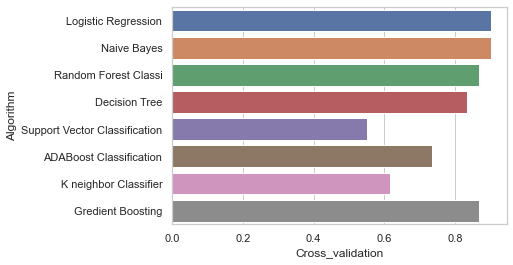

In [221]:
# Algorithm performance
sns.set(style="whitegrid")
ax = sns.barplot(y="Algorithm",x="Cross_validation",data=final_card)

### Logistic Regression Has the best performance

### Hyperparametric Tuning

#### Grid Search Cv

In [223]:
from sklearn.model_selection import GridSearchCV

In [224]:
penalty = ["l1","l2","elasticnet"]
solver = ["newton-cg","lbfgs","liblinear","sag","saga"]
C = [100, 10, 1.0, 0.1, 0.01]
multi_class = ["auto","ovr","multinomial"]
dual=[True,False]
fit_intercept=[True,False]

In [225]:
parameters = {
    "penalty":penalty,
    "solver":solver,
    "C":C,
    "multi_class":multi_class,
    "dual":dual,
    "fit_intercept":fit_intercept
}

In [226]:
print(parameters)

{'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'C': [100, 10, 1.0, 0.1, 0.01], 'multi_class': ['auto', 'ovr', 'multinomial'], 'dual': [True, False], 'fit_intercept': [True, False]}


In [227]:
lr = LogisticRegression()

In [228]:
grid_search=GridSearchCV(estimator=lr,param_grid=parameters,cv=5,n_jobs=-1,verbose=2)

In [229]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 1616 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 4392 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:   10.1s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'dual': [True, False],
                         'fit_intercept': [True, False],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)

In [230]:
grid_search.best_estimator_

LogisticRegression(C=0.1, solver='newton-cg')

In [231]:
grid_search.best_params_

{'C': 0.1,
 'dual': False,
 'fit_intercept': True,
 'multi_class': 'auto',
 'penalty': 'l2',
 'solver': 'newton-cg'}

In [232]:
grid_search.best_score_

1.0

In [233]:
predictions = grid_search.predict(X_test)

In [234]:
print(confusion_matrix(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))
print("\n")
print(classification_report(y_test,predictions))
print("\n")

[[3 0]
 [0 6]]


[[3 0]
 [0 6]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         6

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9





In [236]:
grid_search

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01], 'dual': [True, False],
                         'fit_intercept': [True, False],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=2)

## ROC AUC CURVE

In [237]:
from sklearn.metrics import roc_curve,roc_auc_score

In [238]:
y_pred_prob = grid_search.predict_proba(X_test)[:,1]

In [239]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

In [240]:
fpr

array([0., 0., 0., 1.])

In [241]:
tpr

array([0.        , 0.16666667, 1.        , 1.        ])

In [242]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.90666029e-01, 2.47189432e-08])

Text(0.5, 1.0, 'Logistic Regression Algorithm')

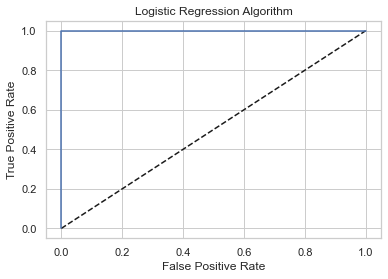

In [243]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression Algorithm')

## Saving the model using Pickle

In [245]:
import pickle

In [246]:
with open("model_pickle","wb") as f:
    
    pickle.dump(grid_search,f)

In [247]:
with open("model_pickle","rb") as f:
    
    wins = pickle.load(f)

## Conclusion

In [248]:
# Using the model to predict a single value

In [249]:
# The model needs to predict 1 i.e Wins between (80 - 100)
# for this inputs
df.iloc[1,0:].values

array([1.000e+00, 6.960e+02, 5.467e+03, 1.349e+03, 2.770e+02, 4.400e+01,
       1.560e+02, 4.390e+02, 1.264e+03, 7.000e+01, 7.000e+02, 6.530e+02,
       4.070e+00, 2.000e+00, 1.200e+01, 4.500e+01, 8.600e+01])

In [250]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,1,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,0,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,0,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [251]:
# Predicting results
wins.predict(sc.transform([[6.960e+02, 5.467e+03, 1.349e+03, 2.770e+02, 4.400e+01,
       1.560e+02, 4.390e+02, 1.264e+03, 7.000e+01, 7.000e+02, 6.530e+02,
       4.070e+00, 2.000e+00, 1.200e+01, 4.500e+01, 8.600e+01]]))

array([1], dtype=int64)

### The model predicted right for this individual value

In [253]:
cm = confusion_matrix(y_test,predictions)

<AxesSubplot:>

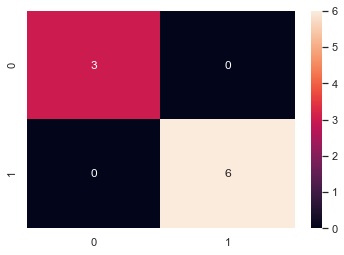

In [254]:
sns.heatmap(data=cm,annot=True)

In [255]:
# Comparing predicted value vs actual value
print(np.concatenate((predictions.reshape(len(predictions),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]]


### Most of the predictions are right

In [258]:
wins.predict(X_test)

array([1, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int64)